In [17]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [4]:
# Load PR data
pr_data_gnn = np.load('../TemporalGNN/results/pr_curve_tgnn.npz')
pre_xg = np.load('../XGBoost/results/precision_xgboost.npy')
rec_xg = np.load('../XGBoost/results/recall_xgboost.npy')

In [11]:
pr_data_gnn

NpzFile '../TemporalGNN/results/pr_curve_tgnn.npz' with keys: precision, recall, thresholds, pr_auc

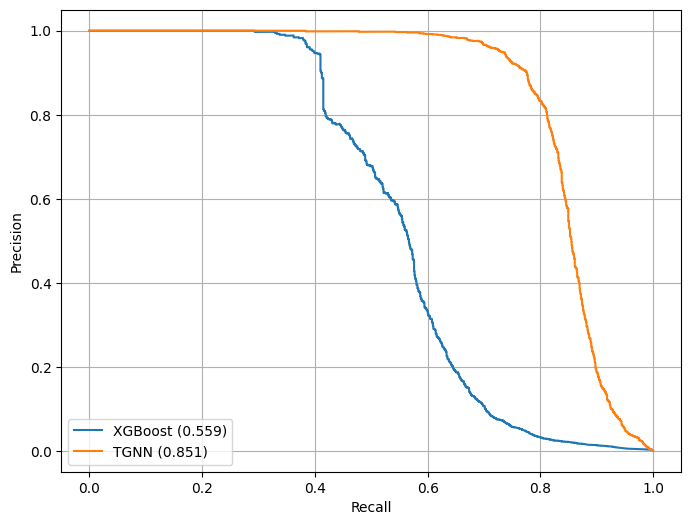

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(rec_xg, pre_xg, label='XGBoost (0.559)')
plt.plot(pr_data_gnn['recall'], pr_data_gnn['precision'], label=f'TGNN ({pr_data_gnn["pr_auc"]:.3f})') 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.savefig('../Figures/pr_curve_comparison.png', dpi=500)

In [19]:
# Training and validation error
with open('../TemporalGNN/results/training_metrics.json') as file:
    gnn_results = json.load(file)

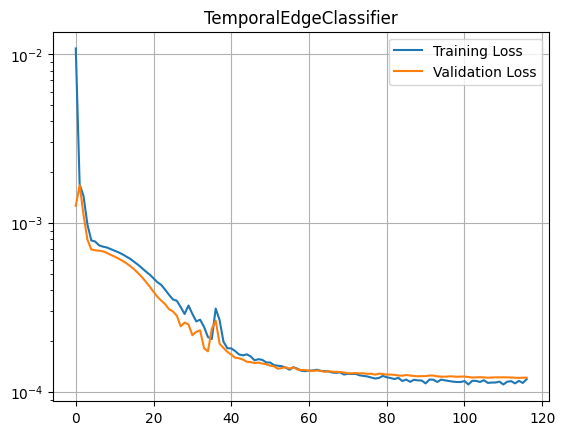

In [26]:
plt.semilogy(gnn_results['train_loss_history'], label='Training Loss')
plt.semilogy(gnn_results['val_loss_history'], label='Validation Loss')
plt.legend()
plt.grid()
plt.title('TemporalEdgeClassifier')
plt.savefig('../Figures/training_validation_loss_tgnn.png', dpi=500)